In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [105]:
df=pd.read_csv("TEST.csv", skip_blank_lines=False,sep="|",header=0, low_memory=False)

In [34]:
df.shape

(2178284, 16)

In [ ]:
df.head(10)

In [106]:
n_df=df.drop(['MerchCategoryCode','SubCategoryCode','CategoryCode'],axis=1)

In [82]:
null_data = n_df.columns[n_df.isnull().any()]
n_df[null_data].isnull().sum()

BasketID             2
BasketDate           3
CalendarMonth        3
CalendarYear         3
CustomerID           3
SalesGross           3
Qty                  3
ProductName          3
MerchCategoryName    3
SubCategoryName      3
CategoryName         3
OrderType            3
StoreState           3
dtype: int64

In [83]:
n_df=n_df.dropna()

In [11]:
n_df.shape
n_df.dtypes;

In [203]:
#minus values in sales and qty show return items
n_df.describe()

,CalendarMonth,CalendarYear,CustomerID,SalesGross,Qty
count,2.178281e+06,2.178281e+06,2.178281e+06,2.178281e+06,2.178281e+06
mean,2.016347e+05,2.016289e+03,9.330401e+06,8.878199e+01,1.190814e+00
std,4.602780e+01,4.533682e-01,4.114384e+06,2.997910e+03,1.256308e+00
min,2.016010e+05,2.016000e+03,2.949312e+06,-7.675700e+04,-5.000000e+01
25%,2.016030e+05,2.016000e+03,5.358568e+06,1.600000e+01,1.000000e+00
50%,2.016070e+05,2.016000e+03,9.328395e+06,3.900000e+01,1.000000e+00
75%,2.017020e+05,2.017000e+03,1.334642e+07,9.100000e+01,1.000000e+00
max,2.017120e+05,2.017000e+03,1.702314e+07,4.240746e+06,4.000000e+02


In [209]:
n_df[n_df['CalendarYear']==2949312.0]


,BasketID,BasketDate,CalendarMonth,CalendarYear,CustomerID,SalesGross,Qty,ProductName,MerchCategoryName,SubCategoryName,CategoryName,OrderType,StoreState


In [ ]:
n_df.groupby(['ProductName']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)

In [88]:
#n_df['CalendarMonth'] = pd.to_datetime(n_df['CalendarMonth'])
#n_df['BasketDate'] = pd.to_datetime(n_df['BasketDate'])
month_revenue=n_df.groupby(['CalendarMonth'])['SalesGross'].sum().reset_index()

In [39]:
n_df.groupby(['CalendarMonth'])['SalesGross'].sum().reset_index().sort_values(by=['SalesGross'],ascending=False)

,CalendarMonth,SalesGross
2,201603.0,1.326265e+07
0,201601.0,1.258968e+07
5,201606.0,1.002310e+07
23,201712.0,9.657934e+06
3,201604.0,9.563648e+06
11,201612.0,9.030153e+06
6,201607.0,8.435377e+06
1,201602.0,8.279114e+06
4,201605.0,8.195881e+06
7,201608.0,6.769719e+06


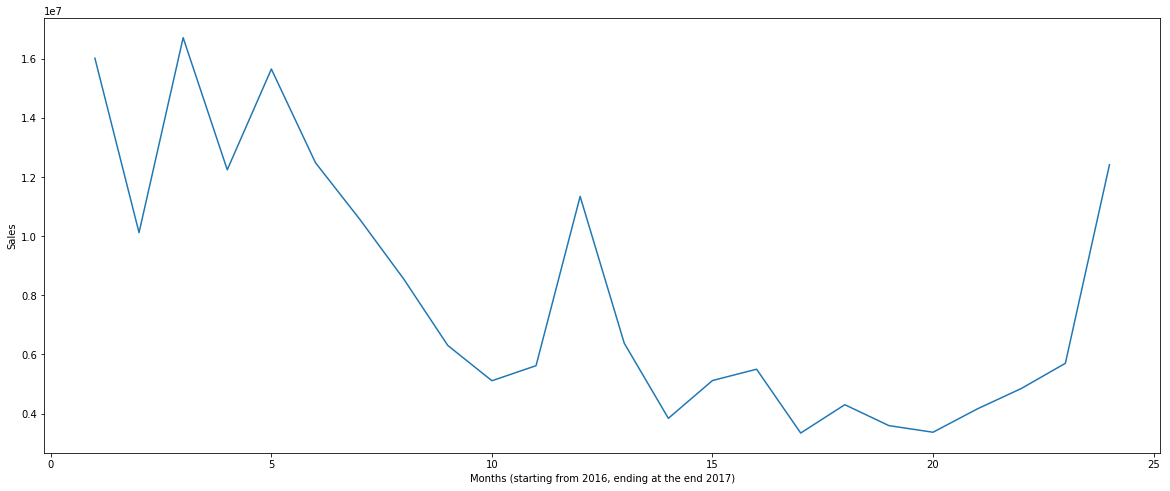

In [89]:
#
x=np.arange(1,25)
y=month_revenue['SalesGross']
plt.figure(figsize=(20,8))
plt.plot(x,y)
plt.xlabel('Months (starting from 2016, ending at the end 2017)')
plt.ylabel('Sales')
plt.rcParams.update({'font.size': 16})
plt.show()


In [90]:
#Change return items to zero

n_df.loc[n_df['Qty']<0,'Qty']=0 

In [91]:
#cancel orders
len(n_df[n_df['Qty']==0])/len(n_df['Qty'])

0.03041021796545074

In [92]:
x=n_df.groupby(['CustomerID'])['Qty'].sum().reset_index()

In [ ]:
x

In [ ]:
n_df.groupby(['Qty'])['SalesGross'].size().reset_index().sort_values(by=['SalesGross'],ascending=False)

In [94]:
cleaned_df=pd.merge(n_df,x,on='CustomerID')
cleaned_df=cleaned_df.drop(['Qty_x'],axis=1)

In [95]:
cleaned_df.loc[cleaned_df['Qty_y']<=0,'Qty_y']=0

cleaned_df = cleaned_df[(cleaned_df[['Qty_y']] > 0).all(axis=1)]

In [96]:
print('length of cleaned_df :',len(cleaned_df), '  and  ' , 'length of actual data :',len(n_df) )

length of cleaned_df : 2175765   and   length of actual data : 2178281


In [97]:
#total number of transactions actually brought revenue 
cleaned_df.groupby(['CalendarYear'])['BasketID'].count().reset_index()

,CalendarYear,BasketID
0,2016.0,1546222
1,2017.0,629543


In [98]:
#total number of transactions
n_df.groupby(['CalendarYear'])['BasketID'].count().reset_index()

,CalendarYear,BasketID
0,2016.0,1548429
1,2017.0,629852


In [99]:
#total number of customers vistied company
n_df.groupby(['CalendarYear'])['CustomerID'].nunique().reset_index()

,CalendarYear,CustomerID
0,2016.0,384722
1,2017.0,180413


In [59]:
#total number of customers bought some products 
cleaned_df.groupby(['CalendarYear'])['CustomerID'].nunique().reset_index()

,CalendarYear,CustomerID
0,2016.0,382914
1,2017.0,180198


In [100]:
#number of actual customers per months
customer_month=cleaned_df.groupby(['CalendarMonth'])['CustomerID'].count().reset_index()

In [101]:
customer_month

,CalendarMonth,CustomerID
0,201601.0,206986
1,201602.0,134847
2,201603.0,204536
3,201604.0,153397
4,201605.0,134413
5,201606.0,173842
6,201607.0,136066
7,201608.0,104453
8,201609.0,77571
9,201610.0,54779


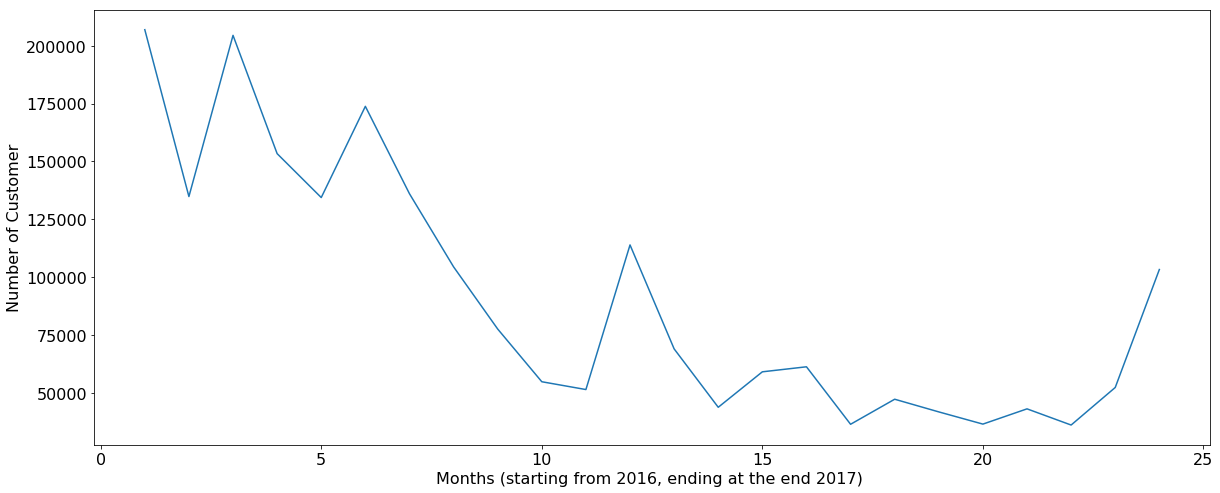

In [102]:
x=np.arange(1,25)
y=customer_month['CustomerID']
plt.figure(figsize=(20,8))
plt.plot(x,y)
plt.xlabel('Months (starting from 2016, ending at the end 2017) ')
plt.ylabel('Number of Customer')
plt.rcParams.update({'font.size': 16})
plt.show()

In [75]:
n_df.groupby(['StoreState']).size().reset_index(name='Count').sort_values(by=['Count'],ascending=False)

,StoreState,Count
6,VIC,1170363
3,QLD,333159
1,NSW,205801
4,SA,140553
7,WA,134272
5,TAS,91674
0,ACT,59436
2,NT,43023


In [107]:
n_df['SalesGross']=round(n_df['SalesGross']*abs(n_df['Qty']))
state_sales=n_df.groupby(['CalendarYear','StoreState'])['SalesGross'].sum().reset_index()
state_Series = [pd.Series(['2017', 'TAS', 0], index=state_sales.columns ),pd.Series(['2017', 'WA', 0], index=state_sales.columns )]
state_sales_1=state_sales.append(state_Series,ignore_index=True)
state_sales_1=state_sales_1.reindex([0,1,2,3,4,5,6,7,8,9,10,11,12,14,13,15])
state_sales_1

,CalendarYear,StoreState,SalesGross
0,2016,ACT,3223223.0
1,2016,NSW,13665606.0
2,2016,NT,8233023.0
3,2016,QLD,21814609.0
4,2016,SA,8148519.0
5,2016,TAS,5964887.0
6,2016,VIC,59336702.0
7,2016,WA,10436467.0
8,2017,ACT,2818111.0
9,2017,NSW,4344401.0


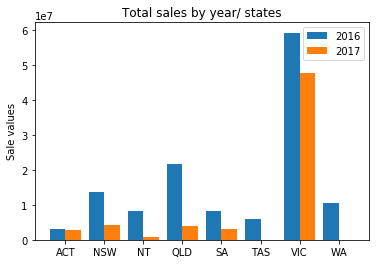

In [108]:
state_sales_sales_2016=state_sales_1['SalesGross'].iloc[0:8]
state_sales_sales_2017=state_sales_1['SalesGross'].iloc[8:16]
labels=['ACT','NSW','NT','QLD','SA','TAS','VIC','WA']
width = 0.4  # the width of the bars
x=np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, state_sales_sales_2016, width, label='2016')
rects2 = ax.bar(x + width/2, state_sales_sales_2017, width, label='2017')
ax.set_ylabel('Sale values')
ax.set_title('Total sales by year/ states')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.rcParams.update({'font.size': 10})
plt.show()

In [ ]:
state_customers=cleaned_df.groupby(['CalendarYear','StoreState'])['CustomerID'].nunique().reset_index()
customer_state_Series = [pd.Series(['2017', 'TAS', 0], index=state_customers.columns ),pd.Series(['2017', 'WA', 0], index=state_customers.columns )]
state_customers_1=state_customers.append(customer_state_Series,ignore_index=True)
state_customers_1=state_customers_1.reindex([0,1,2,3,4,5,6,7,8,9,10,11,12,14,13,15])
state_customers_1

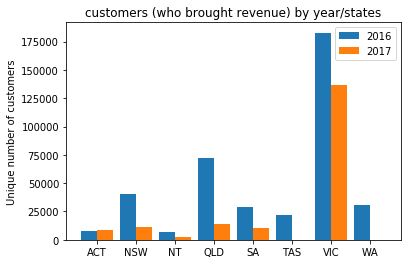

In [110]:
state_customer_2016=state_customers_1['CustomerID'].iloc[0:8]
state_customer_2017=state_customers_1['CustomerID'].iloc[8:16]
labels=['ACT','NSW','NT','QLD','SA','TAS','VIC','WA']
width = 0.4  # the width of the bars
x=np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, state_customer_2016, width, label='2016')
rects2 = ax.bar(x + width/2, state_customer_2017, width, label='2017')
ax.set_ylabel('Unique number of customers')
ax.set_title('customers (who brought revenue) by year/states')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.rcParams.update({'font.size': 10})
plt.show()

In [118]:
# determining new or existing customer for customer segmentation purposes 
customer_data=n_df.groupby(['CustomerID'])['Qty'].size().reset_index()
#customer_data=n_df.groupby(['CustomerID']).size().reset_index(name='Count').sort_values(by=['Count'],ascending=False)
customer_data.columns=['CustomerID','status']
customer_data.loc[customer_data['status']!=1,'status']=0

In [ ]:
n_df_customer_existing=n_df[['CustomerID','BasketDate','SalesGross','Qty','SubCategoryName']]

n_df_customer_existing=pd.merge(n_df_customer_existing, df_first_purchase_date, on='CustomerID')
n_df_customer_existing['first_purchase_date']=pd.to_datetime(n_df_customer_existing['first_purchase_date'])
n_df_customer_existing['BasketDate']=pd.to_datetime(n_df_customer_existing['BasketDate'])
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
n_df_customer_existing['customer_type'] = 'New'
n_df_customer_existing.loc[n_df_customer_existing['BasketDate']>n_df_customer_existing['first_purchase_date'],'customer_type'] = 'Existing'
n_df_customer_existing=n_df_customer_existing.groupby(['BasketDate','customer_type'])['SalesGross'].sum().reset_index()
n_df_customer_existing

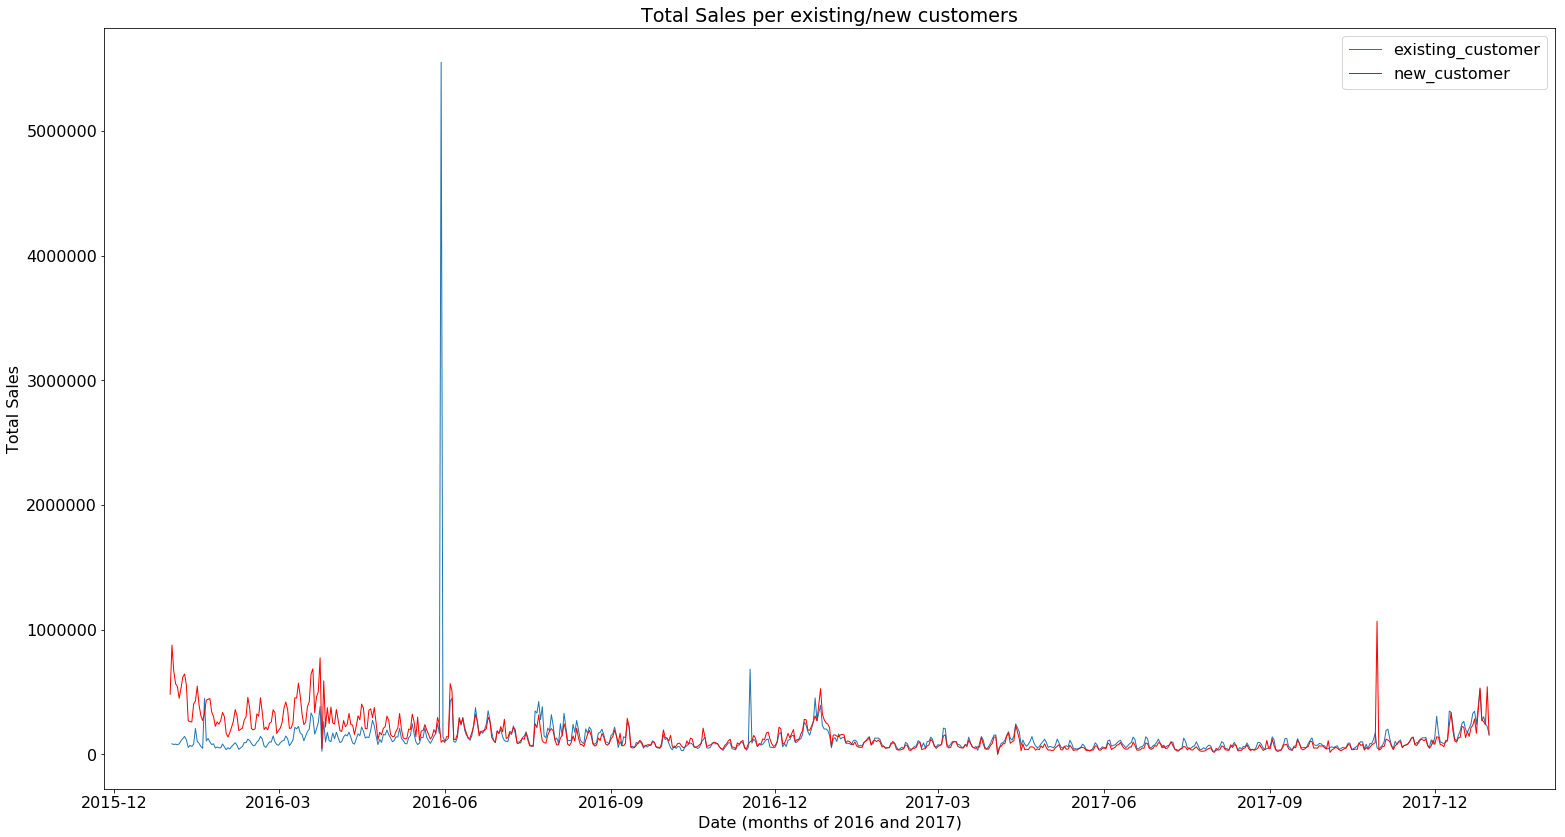

In [140]:

y_1=n_df_customer_existing[n_df_customer_existing['customer_type']=='Existing']
y_2=n_df_customer_existing[n_df_customer_existing['customer_type']=='New']
fig, ax = plt.subplots(figsize=(26, 14))
ax.plot( y_1['BasketDate'], y_1['SalesGross'], linewidth=1,label='existing_customer')
ax.plot( y_2['BasketDate'], y_2['SalesGross'], color='red', linewidth=1,label='new_customer')
ax.legend()
ax.set(xlabel="Date (months of 2016 and 2017)", ylabel="Total Sales", title="Total Sales per existing/new customers")
plt.rcParams.update({'font.size': 16})
plt.show()

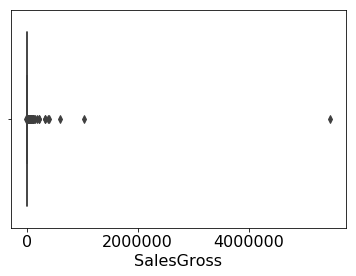

In [141]:
import seaborn as sns
x_visualize=customer_data['SalesGross']
sns.boxplot(x=x_visualize)

In [146]:
n_df_customer_existing['Basketyear']=n_df_customer_existing['BasketDate'].dt.year

In [147]:
n_df_customer_existing.groupby(['Basketyear','customer_type'])['SalesGross'].sum().reset_index()

,Basketyear,customer_type,SalesGross
0,2016,Existing,54984966.0
1,2016,New,75838070.0
2,2017,Existing,33548105.0
3,2017,New,29020977.0


In [129]:
customer_state=pd.pivot_table(cleaned_df, index=['CustomerID'],values=['Qty_y'],columns=['StoreState'],aggfunc=lambda x: len(x.unique()),fill_value=0)
customer_state.columns =customer_state.columns.droplevel()

customer_state=pd.DataFrame(customer_state.to_records())
customer_state['inter_states']=(customer_state==0).astype(int).sum(axis=1)
customer_state.loc[customer_state['inter_states']!=7,'inter_states']=1
customer_state.loc[customer_state['inter_states']==7,'inter_states']=0
customer_inter_states=customer_state[['CustomerID','inter_states']]
customer_inter_states.groupby('inter_states').size().reset_index(name='Count')

,inter_states,Count
0,0,476684
1,1,13131


In [119]:
#number of unique and actual purchases
number_of_purchases=cleaned_df.groupby(['CustomerID'])['Qty_y'].sum().reset_index()

In [120]:
# Total money spent by each customers 
total_money_spent=n_df.groupby(['CustomerID'])['SalesGross'].sum().reset_index()
customer_data=pd.merge(customer_data,total_money_spent,on='CustomerID')

In [ ]:
customer_data

In [122]:
# determining first purchase and last purchase dates and length of being customer in the company
df_first_purchase_date = n_df.groupby('CustomerID').BasketDate.min().reset_index()
df_first_purchase_date.columns=['CustomerID', 'first_purchase_date']
df_last_purchase_date = n_df.groupby('CustomerID').BasketDate.max().reset_index()
df_last_purchase_date.columns=['CustomerID', 'last_purchase_date']
df_first_purchase_date['first_purchase_date']=pd.to_datetime(df_first_purchase_date['first_purchase_date'])
df_last_purchase_date['last_purchase_date']=pd.to_datetime(df_last_purchase_date['last_purchase_date']);
customer_data=pd.merge(customer_data,df_first_purchase_date,on='CustomerID')
customer_data=pd.merge(customer_data,df_last_purchase_date,on='CustomerID')
customer_data=pd.merge(customer_data,number_of_purchases,on='CustomerID')
customer_data['length of membership']=customer_data['last_purchase_date']-customer_data['first_purchase_date']

In [123]:
# finding the number of days since last visit in reference to the end of 2017
customer_data['Resency']=(df_first_purchase_date['first_purchase_date'].max()-df_first_purchase_date['first_purchase_date'])

In [124]:
# converting the date type data to int type for further processing
customer_data['Resency']=customer_data['Resency'].astype('timedelta64[D]')

In [ ]:
cleaned_df.groupby(['MerchCategoryName']).size().reset_index(name='Count').sort_values(by=['Count'],ascending=False)

In [126]:
# pivoting the number of different purchase types of actual customers  
customer_category= pd.pivot_table(cleaned_df, index=['CustomerID'],values=['Qty_y'],columns=['CategoryName'],aggfunc=lambda x: len(x.unique()),fill_value=0)

In [127]:
# converting back to dataframe for products 
customer_category.columns = customer_category.columns.droplevel()
customer_category=pd.DataFrame(customer_category.to_records())
#customer_category=customer_category.drop(['index'],axis=1)

In [ ]:
customer_data=pd.merge(customer_data,customer_category,on='CustomerID')
customer_data

In [131]:
customer_data=pd.merge(customer_data,customer_inter_states,on='CustomerID')

In [143]:
customer_data.groupby(['inter_states'])['SalesGross'].mean().reset_index().sort_values(by=['SalesGross'],ascending=False)

,inter_states,SalesGross
1,1,1192.538649
0,0,373.197525


In [ ]:
customer_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

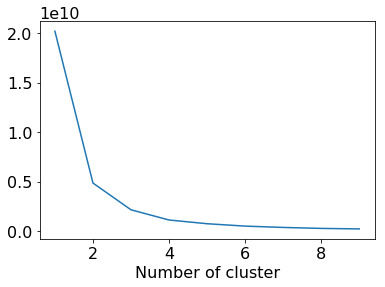

In [148]:
from sklearn.cluster import KMeans

sse={}
tx_recency = customer_data[['Resency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [150]:
from sklearn.mixture import GaussianMixture as GMM
x_clus=customer_data['Resency'].values.reshape(-1, 1) 
gmm=GMM(covariance_type='full', n_components=5)
gmm.fit(x_clus)
customer_data['Resency_seg']=gmm.predict(x_clus)

In [155]:
customer_data[['CustomerID','Resency','Resency_seg']]

customer_data.groupby(['Resency_seg']).agg({'CustomerID':'count','SalesGross':sum, 'Resency':'median'})
customer_data.groupby(['Resency_seg']).agg({'CustomerID':'count','SalesGross':sum, 'Resency':'mean'})
customer_data.groupby(['Resency_seg']).agg({'CustomerID':'count','SalesGross':sum, 'Resency':'sum'})

customer_data.groupby(['Resency_seg']).agg({'CustomerID':'count','SalesGross':sum})


,CustomerID,SalesGross
Resency_seg,,
0,75185,29166689.0
1,197392,81226597.0
2,38325,15430475.0
3,135643,51216598.0
4,43270,16516155.0


In [158]:
customer_data=customer_data.drop(['Resency_seg'],axis=1)

In [ ]:
customer_data.head()

In [ ]:
from sklearn.cluster import KMeans
x_clus_kmean=customer_data['Resency'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_clus_kmean)
customer_data['Resency_seg_kmean'] = kmeans.predict(x_clus_kmean)
customer_data['Resency_seg_kmean']

In [70]:
customer_data.groupby(['Resency_seg_kmean']).agg({ 'Resency':'median'});

In [161]:
def order_cluster_1 (cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=True).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [162]:
sorted_cluster=order_cluster_1('Resency_seg_kmean', 'Resency',customer_data,True)

In [163]:
sorted_cluster=sorted_cluster[['CustomerID','Resency_seg_kmean','Resency']]

In [164]:
sorted_cluster.groupby(['Resency_seg_kmean']).agg({ 'Resency':'median'})

,Resency
Resency_seg_kmean,
0,49.0
1,244.0
2,388.0
3,567.0
4,686.0


In [ ]:
customer_data.groupby(['Resency_seg_kmean']).agg({'CustomerID':'count', 'Resency':'median'})

In [166]:
customer_data['frequency']=customer_data['Qty_y']/customer_data['length of membership'].astype('timedelta64[D]')
customer_data['frequency']=customer_data['frequency'].replace(np.inf,0)
customer_data['frequency'];

In [208]:
customer_data.groupby(['frequency']).size().reset_index(name='count').sort_values(by=['frequency']);

In [171]:
#from sklearn.cluster import KMeans
kmean_clus_freq=customer_data['frequency'].values.reshape(-1, 1) 
kmeans_freq= KMeans(n_clusters=10)
kmeans_freq.fit(kmean_clus_freq)
customer_data['freq_seg'] = kmeans_freq.predict(kmean_clus_freq)


In [172]:
customer_data.groupby(['freq_seg']).agg({'CustomerID':'count', 'frequency':'median'})

,CustomerID,frequency
freq_seg,,
0,484078,0.0000
1,1,272545.4375
2,1,26364.0000
3,1,49755.7500
4,1,9951.0000
5,124,394.0000
6,5,2970.0000
7,4896,36.0000
8,18,1046.0000


In [173]:
customer_data['Qty_y'].describe()

count    4.898150e+05
mean     1.668820e+02
std      7.478251e+04
min      1.000000e+00
25%      2.000000e+00
50%      9.000000e+00
75%      3.600000e+01
max      5.232872e+07
Name: Qty_y, dtype: float64

In [174]:
customer_data['frequency_seg']=np.where((customer_data.Qty_y>167),1000,customer_data.Qty_y)
kmean_clus_freq_new=customer_data['frequency_seg'].values.reshape(-1, 1) 
kmeans_freq= KMeans(n_clusters=10)
kmeans_freq.fit(kmean_clus_freq_new)
customer_data['frequency_seg'] = kmeans_freq.predict(kmean_clus_freq_new)

In [175]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [176]:
sorted_cluster_freq=order_cluster('frequency_seg', 'Qty_y',customer_data,False)
sorted_cluster_freq=sorted_cluster_freq[['CustomerID','frequency_seg', 'Qty_y']] 

In [177]:
 sorted_cluster_freq.groupby(['frequency_seg']).agg({ 'Qty_y':'mean'})

,Qty_y
frequency_seg,
0,2079.087561
1,149.941229
2,125.263530
3,103.500680
4,83.990276
5,63.006471
6,41.460112
7,24.837445
8,11.795604


In [178]:
q1=customer_data['SalesGross'].quantile(0.25)
q3=customer_data['SalesGross'].quantile(0.75)
IQR=q3-q1

In [179]:
customer_data['SalesGross'].describe()

count    4.898150e+05
mean     3.951625e+02
std      8.125623e+03
min     -1.462100e+04
25%      8.200000e+01
50%      1.920000e+02
75%      4.240000e+02
max      5.467166e+06
Name: SalesGross, dtype: float64

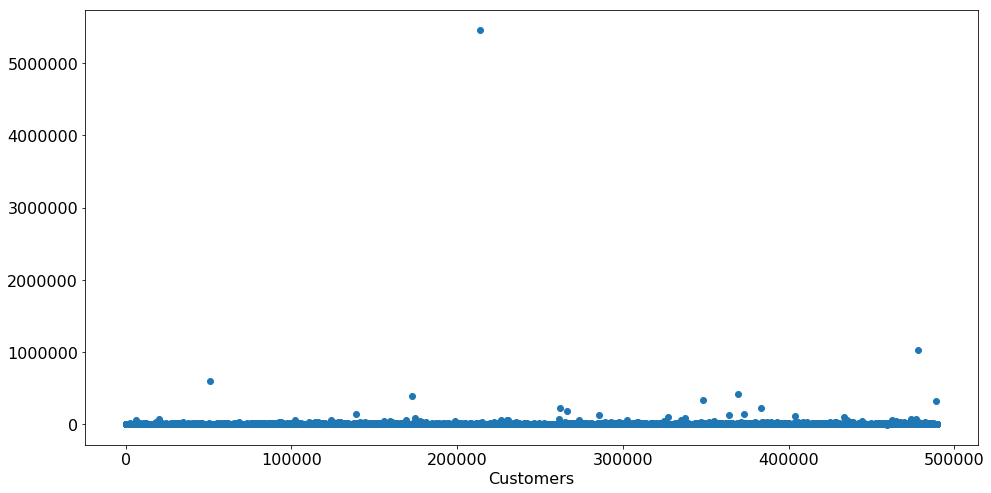

In [180]:
range_cust=np.arange(0,len(customer_data['CustomerID']))

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(range_cust,customer_data['SalesGross'])
ax.set_xlabel('Customers')
ax.set_ylabel('')
plt.show()


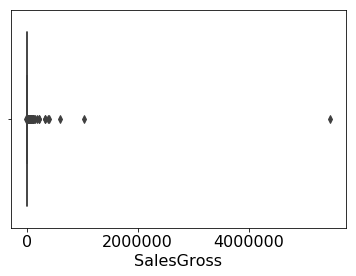

In [181]:
sns.boxplot(x=customer_data['SalesGross'])

In [219]:
 customer_data['SalesGross'] ;

In [92]:
sum(customer_data['SalesGross'])

199246619.0

In [178]:
#ran=np.arange(0,len(customer_data['SalesGross']))
#a = np.zeros(shape=(len(customer_data['SalesGross']),1))
#len(a)
#customer_data['SalesGross_seg']=pd.DataFrame(a,columns=['SalesGross_segment'])
#me=customer_data['SalesGross'].mean()

#for i in ran:
#    if customer_data['SalesGross'][i]>q3:
#       emt.loc[i]=20


In [182]:
customer_data['SalesGross_seg']=customer_data['SalesGross']

In [183]:
customer_data['SalesGross_seg']=np.where((customer_data.SalesGross_seg>500),2000,customer_data.SalesGross_seg)
customer_data['SalesGross_seg']=np.where((customer_data.SalesGross_seg<0),-2000,customer_data.SalesGross_seg)

In [184]:
sale_kmean=customer_data['SalesGross_seg'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=10)
kmeans.fit(sale_kmean)
customer_data['SalesGross_seg'] = kmeans.predict(sale_kmean)
customer_data['SalesGross_seg'];

In [185]:
customer_data[['SalesGross_seg','SalesGross']];


In [ ]:
sorted_cluster_sales=order_cluster('SalesGross_seg', 'SalesGross',customer_data,False)
sorted_cluster_sales=sorted_cluster_sales[['CustomerID','SalesGross_seg', 'SalesGross']]
sorted_cluster_sales

In [187]:
sorted_cluster_sales.groupby(['SalesGross_seg']).agg({ 'SalesGross':'mean'})

,SalesGross
SalesGross_seg,
0,1253.199392
1,453.089517
2,371.601225
3,301.122771
4,239.178547
5,177.186717
6,120.827241
7,70.831777
8,26.992792


In [190]:
sorted_final=pd.merge(sorted_cluster_sales,sorted_cluster_freq,on='CustomerID')
sorted_final=pd.merge(sorted_final,sorted_cluster,on='CustomerID')

In [ ]:
sorted_final.sort_values(by='SalesGross')

In [193]:
sorted_final['FinalScore'] = sorted_final['SalesGross_seg'] + sorted_final['frequency_seg'] + sorted_final['Resency_seg_kmean']
sorted_final.groupby(['FinalScore']).agg({'CustomerID':'count', 'SalesGross_seg':'median','frequency_seg':'median','Resency_seg_kmean':'median'})


,CustomerID,SalesGross_seg,frequency_seg,Resency_seg_kmean
FinalScore,,,,
0,2167,0,0,0
1,2799,0,0,1
2,5433,0,0,2
3,10127,0,0,3
4,17038,0,0,4
5,7458,0,2,3
6,8516,0,3,3
7,10472,0,4,3
8,13204,0,5,3


In [195]:
sorted_final.groupby(['FinalScore']).agg({'CustomerID':'count', 'SalesGross_seg':'median','frequency_seg':'median','Resency_seg_kmean':'median'}).sort_values(by=['CustomerID'])

,CustomerID,SalesGross_seg,frequency_seg,Resency_seg_kmean
FinalScore,,,,
22,217,9,9,4
0,2167,0,0,0
1,2799,0,0,1
2,5433,0,0,2
5,7458,0,2,3
6,8516,0,3,3
3,10127,0,0,3
7,10472,0,4,3
8,13204,0,5,3


In [102]:
len(sorted_final.groupby('FinalScore')['SalesGross_seg','frequency_seg','Resency_seg_kmean'].median())

23

In [196]:
sorted_final['Final_Segment'] = 'super-Low-Value'
sorted_final.loc[sorted_final['FinalScore']<5,'Final_Segment'] = 'super-high-Value' 
sorted_final.loc[((sorted_final['FinalScore']<9) & (sorted_final['FinalScore']>5)),'Final_Segment'] = 'very-High-Value' 
sorted_final.loc[((sorted_final['FinalScore']<12) & (sorted_final['FinalScore']>9)),'Final_Segment'] = 'high-Value' 
sorted_final.loc[((sorted_final['FinalScore']<15) & (sorted_final['FinalScore']>12)),'Final_Segment'] = 'moderate-Value' 
sorted_final.loc[((sorted_final['FinalScore']<18) & (sorted_final['FinalScore']>15)),'Final_Segment'] = 'low-value' 


In [111]:
sorted_final.to_csv('customer_segmentation.csv')

In [249]:
customer_data['SEGMENT_SCORE']=customer_data.Resency_seg_kmean.astype(str)+customer_data.freq_seg_new.astype(str)+customer_data.SalesGross_seg.astype(str)

In [257]:
final_segment=customer_data.groupby(['SEGMENT_SCORE']).agg({'CustomerID':'count','SalesGross':'mean','Resency':'mean', 'Qty_y':'median'})
len(final_segment)

35

In [ ]:
final_segment.sort_values(by='CustomerID')

In [231]:
from sklearn.mixture import GaussianMixture as GMM
seg_clus=customer_data[['SalesGross_seg','freq_seg','Resency_seg_kmean']];

#seg_clus=seg_clus.values.reshape(-1, 1) 
gmm=GMM(covariance_type='full', n_components=10)
gmm.fit(seg_clus)
customer_data['seg_clus']=gmm.predict(seg_clus)

In [336]:
customer_data.groupby(['seg_clus']).agg({'SEGMENT_SCORE':'count','SalesGross':'mean','Resency':'mean', 'frequency':'median'})

,SEGMENT_SCORE,SalesGross,Resency,frequency
seg_clus,,,,
0,74220,122.048909,272.053045,0.000000
1,13580,918.154566,606.205007,4.000000
2,105092,121.347353,479.951176,0.000000
3,5762,2200.839292,499.009545,42.000000
4,83828,777.398411,603.457484,0.147596
5,78176,66.377929,683.510016,0.000000
6,63803,780.465621,391.783411,0.129187
7,10266,881.041399,396.590201,4.000000
8,47066,207.698763,683.074619,0.000000


In [ ]:
churn_data=sorted_final.drop(['FinalScore','SalesGross','Qty_y','Resency','Final_Segment'],axis=1)
customer_data=customer_data.drop(['last_purchase_date','Resency','Qty_y','first_purchase_date','Resency_seg_kmean','frequency_seg','SalesGross_seg'],axis=1)
customer_data['length of membership']=customer_data['length of membership'].astype('timedelta64[D]')
churn_data=pd.merge(customer_data,churn_data,on='CustomerID')

In [202]:
churn_data.head()

,CustomerID,SalesGross_seg,frequency_seg,Resency_seg_kmean
0,2949312.0,8,9,2
1,2949456.0,8,9,3
2,2949590.0,8,9,2
3,2949710.0,8,9,4
4,2950082.0,8,9,2


In [115]:
churn_2016=cleaned_df[cleaned_df['CalendarYear']==2016]
churn_2017=cleaned_df[cleaned_df['CalendarYear']==2017]

In [116]:
print('number of actual 2016 transactions: ' ,len(churn_2016), ' VS', 'number of actual 2017 transactions: ' ,len(churn_2017))

number of actual 2016 transactions:  1546222  VS number of actual 2017 transactions:  629543


In [118]:
churn_2016=churn_2016[['CustomerID','OrderType']]
churn_2017=churn_2017[['CustomerID','OrderType']]

In [119]:
churned_df=pd.merge(churn_2016,churn_2017,how='left',on='CustomerID')

In [120]:
churned_df=churned_df.fillna(0)

In [123]:
churned_df.groupby(['OrderType_y']).count()

,CustomerID,OrderType_x
OrderType_y,,
0,1178497,1178497
Click & Collect,34635,34635
Delivery,68679,68679
In-Store,1822310,1822310
Online Return,223,223


In [124]:
churned_df['churn_status']=churned_df['OrderType_y'].copy()

In [125]:
churned_df.loc[churned_df['churn_status']!=0,'churn_status']=1


In [126]:
churn_data_2016=churned_df.groupby(['CustomerID'])['churn_status'].max()

In [127]:
churn_data_2016=pd.DataFrame(churn_data_2016)

In [128]:
customer_churn_ordertype=pd.pivot_table(churned_df, index=['CustomerID'],values=['churn_status'],columns=['OrderType_x'],aggfunc=lambda x: len(x.unique()),fill_value=0)
customer_churn_ordertype.columns =customer_churn_ordertype.columns.droplevel()

customer_churn_ordertype=pd.DataFrame(customer_churn_ordertype.to_records())

In [129]:
churn_data_2016=pd.merge(customer_churn_ordertype,churn_data_2016,on='CustomerID')

In [132]:
churn_main_data=pd.merge(churn_data_2016,churn_data,on='CustomerID')

In [133]:
churn_main_data=pd.merge(churn_main_data, total_money_spent,on='CustomerID')

In [138]:
churn_main_data.groupby(['churn_status'])['CustomerID'].count().reset_index()

,churn_status,CustomerID
0,0,309617
1,1,73297


In [589]:
corr_churn_data_2016=churn_main_data.drop(['CustomerID'],axis=1)


In [596]:
from sklearn.preprocessing import Normalizer
normalizeddf_churn_data = Normalizer().fit_transform(corr_churn_data_2016)
normalizeddf_churn_data=pd.DataFrame(normalizeddf_churn_data,columns=['Click & Collect','Delivery','In-Store','Online Return','churn_status','status','length of membership','4WD & TOURING','APPAREL','AUTO & HAND TOOLS','BIKES','BOATING','CAMPING','CARCARE','CYCLING','DO NOT USE','FISHING','FOOTBALL','FOOTWEAR','GAS FUEL & BBQING','GIFTS & TOYS','HARD FITNESS','HARDWARE TOOLS','IN CAR TECH','INDIVIDUAL SPORTS','LEISURE & OUTDOOR','LUBRICANTS','MENS CLOTHING','MISC SALES','PAINT & PANEL','POWER & IMPULSE','PROMOTIONS','SAFETY & COMFORT ON THE ROAD','SEASONAL SPORTS','SENIOR FOOTWEAR','SERVICES & GIVEAWAYS','SKI','SOFT FITNESS','SPARE PARTS','SWIM','TEAM SPORTS','TOURING','Unknown','VISION & ELECTRICAL','inter_states','SalesGross_seg','frequency_seg','Resency_seg_kmean','SalesGross'])
corrmatrix= normalizeddf_churn_data.corr()
corrmatrix.style.background_gradient(cmap='coolwarm')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


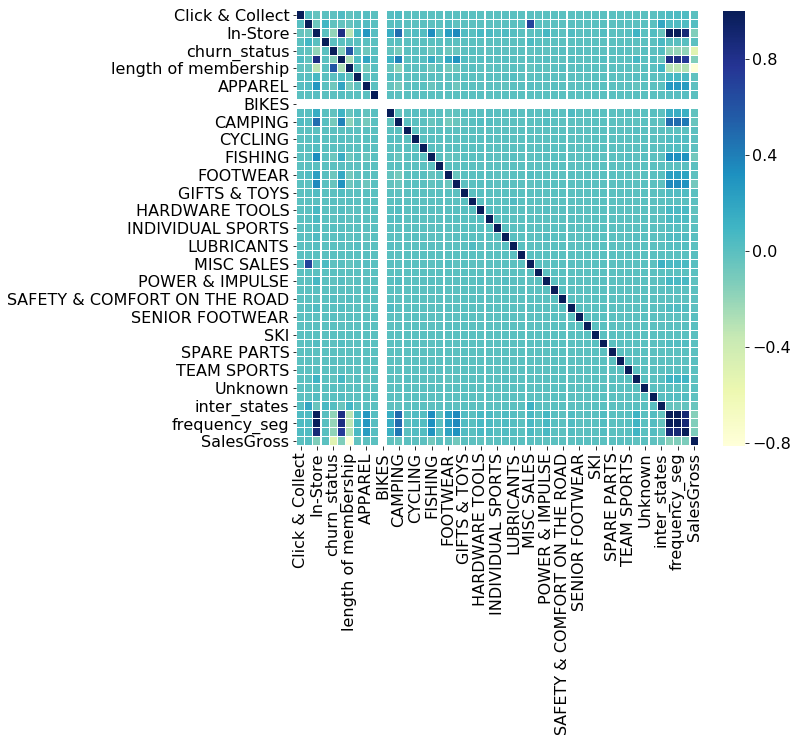

In [597]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmatrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [ ]:
churn_main_data.groupby(['BIKES']).size().reset_index()

In [ ]:
churn_main_data=churn_main_data.drop(['BIKES','status','SalesGross'],axis=1)

In [634]:
churn_main_data.columns= ['CustomerID','Click & Collect','Delivery','In-Store','Online Return','churn_status','length of membership','4WD & TOURING','APPAREL','AUTO & HAND TOOLS','BOATING','CAMPING','CARCARE','CYCLING','DO NOT USE','FISHING','FOOTBALL','FOOTWEAR','GAS, FUEL & BBQ ING','GIFTS & TOYS','HARD FITNESS','HARDWARE TOOLS','IN CAR TECH','INDIVIDUAL SPORTS','LEISURE & OUTDOOR','LUBRICANTS','MENS CLOTHING','MISC SALES','PAINT & PANEL','POWER & IMPULSE','PROMOTIONS','SAFETY & COMFORT ON THE ROAD','SEASONAL SPORTS','SENIOR FOOTWEAR','SERVICES & GIVEAWAYS','SKI','SOFT FITNESS','SPARE PARTS','SWIM','TEAM SPORTS','TOURING','Unknown','VISION & ELECTRICAL','inter_states','SalesGross_seg','frequency_seg','Resency_seg_kmean']
churn_main_data= churn_main_data[['CustomerID','churn_status','Click & Collect','Delivery','In-Store','Online Return','4WD & TOURING','APPAREL','AUTO & HAND TOOLS','BOATING','CAMPING','CARCARE','CYCLING','DO NOT USE','FISHING','FOOTBALL','FOOTWEAR','GAS, FUEL & BBQ ING','GIFTS & TOYS','HARD FITNESS','HARDWARE TOOLS','IN CAR TECH','INDIVIDUAL SPORTS','LEISURE & OUTDOOR','LUBRICANTS','MENS CLOTHING','MISC SALES','PAINT & PANEL','POWER & IMPULSE','PROMOTIONS','SAFETY & COMFORT ON THE ROAD','SEASONAL SPORTS','SENIOR FOOTWEAR','SERVICES & GIVEAWAYS','SKI','SOFT FITNESS','SPARE PARTS','SWIM','TEAM SPORTS','TOURING','Unknown','VISION & ELECTRICAL','inter_states','SalesGross_seg','frequency_seg','Resency_seg_kmean','length of membership']]

In [4]:
target_data=churn_main_data['churn_status']
training_data=churn_main_data.iloc[:,2:43] 


In [5]:
from sklearn import preprocessing

x = churn_main_data.iloc[:,43:47]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_feature = pd.DataFrame(x_scaled,columns=['SalesGross_seg','frequency_seg','Resency_seg_kmean','length of membership'])
training_data=pd.concat([training_data,normalized_feature],axis=1)

In [669]:
churn_main_data.to_csv('churn.csv')

In [3]:
churn_main_data=pd.read_csv('churn.csv')
churn_main_data=churn_main_data.drop(['Unnamed: 0'],axis=1)

In [14]:
churn_main_data.groupby(['churn_status']).size().reset_index()

,churn_status,0
0,0,309617
1,1,73297


In [6]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data, target_data, test_size=0.2)

In [7]:
y_train.value_counts()

0    247758
1     58573
Name: churn_status, dtype: int64

In [8]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [9]:
np.bincount(y_train)

array([247758, 247758], dtype=int64)

In [10]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
randomforest_classifier = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
randomforest_classifier.fit(X_train,y_train)
predictions_randomfor_classifier=randomforest_classifier.predict(X_test)
randomforest_classifier.score(X_test, y_test)

0.943003016335218

In [11]:
accuracy_score(y_test, predictions_randomfor_classifier)

0.943003016335218

In [24]:
predictions_actualdata=randomforest_classifier.predict(training_data)


In [25]:
predictions_actualdata_1=pd.DataFrame(predictions_actualdata,columns=['predictions'])



In [26]:
main_churpredication_data=pd.concat([churn_main_data[['CustomerID','churn_status']],predictions_actualdata_1],axis=1)
main_churpredication_data.to_csv('main_churpredication_data.csv')

In [12]:
from sklearn.metrics import confusion_matrix
conf_mat= confusion_matrix(y_test, predictions_randomfor_classifier)
print(conf_mat)

[[59087  2772]
 [ 1593 13131]]


In [ ]:
#when to call/contact customer for chur purposes 
grouped_single = cleaned_df.groupby('CustomerID').agg({'CalendarMonth': ['median', 'min', 'max']})
grouped_single.columns = grouped_single.columns.droplevel()
grouped_single=pd.DataFrame(grouped_single.to_records())

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model = Sequential()
model.add(Dense(22, input_dim=45, init='uniform', activation='relu'))
model.add(Dense(12, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))             
               
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size = 3800, nb_epoch = 100)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat= confusion_matrix(y_test, y_pred)
print(conf_mat)